# LINEAR REGRESSION IN PYTHON (BME 230)

Single variable linear regression is a simple form of machine learning. The purpose of this practice is to fairly completely understand single variable linear regression in a computational biology setting. The result should help you understand basic ideas in machine learning and how you can use these models in your research.

This lecture assumes you have a working knowledge of Python, Pandas and Numpy and will teach you some scikit-learn.


#### DATASET http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/

#### Link to processed datafile from Google Drive if you want to download:

https://drive.google.com/file/d/1FZbQCEHr2Rie4cXSM6Udg0SaWTtPnEHO/view?usp=sharing

# Wisconsin Breast Cancer Database


1. Number of Instances: 699 (as of 15 July 1992)

2. Number of Attributes: 10 plus the class attribute

3. Attribute Information: (class attribute has been moved to last column)
   Attribute                     Domain
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)

4. Missing attribute values: 16

   There are 16 instances in Groups 1 to 6 that contain a single missing 
   (i.e., unavailable) attribute value, now denoted by "?".  

5. Class distribution:
 
   Benign: 458 (65.5%)
   Malignant: 241 (34.5%)

# Load the data

First copy the data from Google Drive to a local file.

The data is in a comma separated value (csv) file:

![alt text](https://static.goanywhere.com/images/tutorials/csv-to-database/input-file.png)

* Above is an illustration of CSV format. Each line gives a comma separated sequence of N text strings

* CSV files are like simple tables.

In [3]:
# Copy the file from the internet
import urllib.request

url = "https://raw.githubusercontent.com/benedictpaten/intro_python/main/lecture_notebooks/data/breast-cancer-wisconsin.data.csv"
cancer_data_file = 'cancer_data.csv'

urllib.request.urlretrieve(url, cancer_data_file) # This function copies the thing the url points at into
# a local file copy

('cancer_data.csv', <http.client.HTTPMessage at 0x15cd2bb50>)

**Import the Pandas and Numpy modules**

* Numpy is an "array" and "matrix" library, used to represent large collections of data efficiently in Python

* Pandas builds on Numpy to provide a "spreadsheet like" package for manipulating tables of data and performing statistical analyses.

* For more details see the appendices at the end of the notebook and the linked tutorials.

In [6]:
# Load the data into a Pandas data frame

import numpy as np
import pandas as pd

# Read input
df = pd.read_csv("cancer_data.csv") #./data/breast-cancer-wisconsin.data.csv")
df.head(20)

,id,clump-thickness,uniformity-of-cell-size,uniformity-of-cell-shape,marginal-adhesion,single-epithelial-cell-size,bare-nuclei,bland-chromatin,normal-nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


# Preprocess The Data

In data science and machine learning frequently much of the challenge is in preprocessing the data into a format that is ameniable to the algorithms used.

Here we don't need to do too much, we just normalize the data.

See: https://scikit-learn.org/stable/modules/preprocessing.html

In [5]:
# Preprocess the data so we can use it for regression with SKLearn. 
# Access function/method docstrings in jupyter via '?'. Ex: preprocessing.LabelEncoder?
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()

for col in df.columns: # For each column in the data frame
    df[col] = encoder.fit_transform(df[col]) # Transform the series so is zero based
    
df.head(20)

,id,clump-thickness,uniformity-of-cell-size,uniformity-of-cell-shape,marginal-adhesion,single-epithelial-cell-size,bare-nuclei,bland-chromatin,normal-nucleoli,mitoses,class
0,172,4,0,0,0,1,0,2,0,0,0
1,175,4,3,3,4,6,1,2,1,0,0
2,176,2,0,0,0,1,2,2,0,0,0
3,177,5,7,7,0,2,4,2,6,0,0
4,179,3,0,0,2,1,0,2,0,0,0
5,180,7,9,9,7,6,1,8,6,0,1
6,181,0,0,0,0,1,1,2,0,0,0
7,182,1,0,1,0,1,0,2,0,0,0
8,186,1,0,0,0,1,0,0,0,4,0
9,186,3,1,0,0,1,0,1,0,0,0


# Linear Regression w/One Variable

We suppose we have a set of pairs:

\begin{equation}
(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n)
\end{equation}

The task is to try to predict $y_i$ given $x_i$. Call our prediction $y'_i$,  in linear regression we use the following simple linear equation for our prediction:

\begin{equation}
y'_i = w*x_i+b
\end{equation}

In this picture the pairs:

\begin{equation}
(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n)
\end{equation}

are the blue dots and our prediction:

\begin{equation}
y'_i = w*x_i+b
\end{equation}

is the red line

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/2560px-Linear_regression.svg.png" width=500 height=300 />



In Python:

In [4]:
def predict(x, w, b):
    return x*w + b # return value is a prediction y'

The task of machine learning here is to learn the parameters of the model, that is $w$ and $b$. **To do this, we need some way of deciding the value of our parameter choices.** 


# Cost function (aka loss function/risk function):

A loss function is used to determine how well a model predicts, and is used in learning.

We are using mean squared error. 
\begin{equation}
MSE = \frac{1}{n} \sum_{i=1}^n (y_i - (wx_i+b))^2
\end{equation}


We visualize this error calculation as shown. 

The error is proportional to the sum of the squared length of the green lines:

<img src="https://upload.wikimedia.org/wikipedia/commons/5/53/Linear_least_squares_example2.png" width=200 height=200 />


In [5]:
def cost_function(x, y, w, b):
    assert len(x) == len(y)
    n = len(x)
    total_error = 0.0
    for i in range(n):
        total_error += (y[i] - (w*x[i] + b))**2
    return total_error / n

We can visualize the cost function for different choices of w and b:

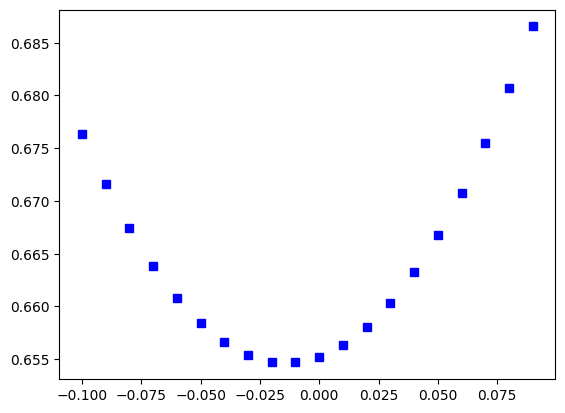

In [27]:
%matplotlib inline  
# The above is required to display matplotlib in jupyter
import matplotlib.pyplot as plt

x = df['mitoses']
y = df['class']

# Plot of cost as function of w
#N's notes: w represents the weight, or the slope of the classification line
plt.plot(np.arange(-0.1, 0.1, 0.01), [ cost_function(x, y, w, 1.0) for w in np.arange(-0.1, 0.1, 0.01)], 'bs')
plt.show()

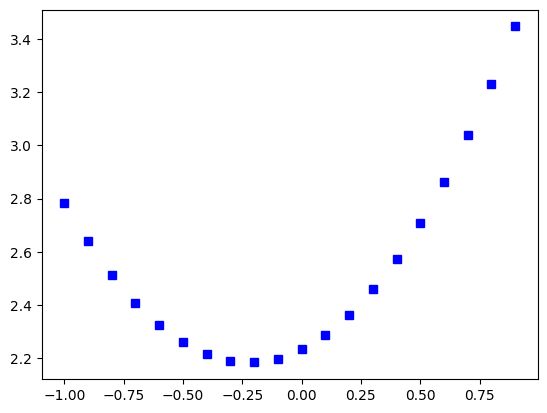

In [28]:
# Plot of cost as function of b
#N's notes: b represents the intercept of the classification line
plt.plot(np.arange(-1.0, 1., 0.1), [ cost_function(x, y, 1.0, b) for b in np.arange(-1.0, 1., 0.1)], 'bs')
plt.show()


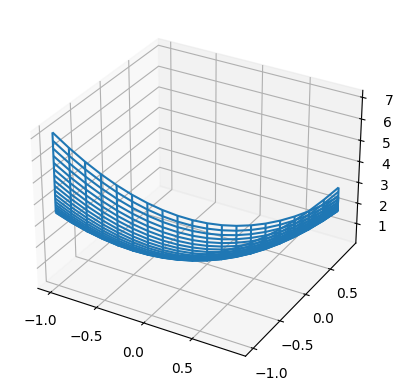

In [29]:
# 3d Plot of cost as function of w, b to see that they are not independent, but that the function is convex

#not independent - 
#that is, the values of the variables depend on on another, since they must fall on the classification line 

#but the surface described by the function of w and b is concave down with a global minimum we want the model to learn


from itertools import product
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

W = np.arange(-1.0, 1, 0.1)
B = np.arange(-1.0, 1., 0.1)

Z = np.array([ [ cost_function(x, y, w, b) for w in W ] for b in B ])

ax.plot_wireframe(W, B, Z)

Having defined a model and a cost function, the next thing to do is define a learning method which can find good parameters for the model.

"""This is to say, how do we program the model to learn the best values of w and b that will minimize the cost function, giving us the best approximation of the classifer?"""

# Gradient descent
Having defined a model and a cost function, the next thing to do is define a learning method which can find good parameters for the model.

For the case of simple linear regression we could calculate the optimum parameters analytically, but here we choose to use gradient descent. Gradient descent is an iterative method that can be used to optimize a large class of problems, many of which can not be solved exactly.

*Optimize meaning find the values at the function's global minimum.*

In Gradient Descent the idea is to use the derivative (rate of change) of the cost function to iteratively search for the point where the parameters minimize the MSE: 

![alt text](https://miro.medium.com/max/1400/1*HrFZV7pKPcc5dzLaWvngtQ.png)

(In the picture J(w) is the cost function and we traverse the cost function for the w parameter by iteratively moving toward the global minimum)

There are two parameters (coefficients) in our cost function we can control: weight $w$ and bias $b$. Since we need to consider the impact each one has on the final prediction (seperately), we use partial derivatives.
Recall the MSE cost function (here called $f$):
\begin{equation}
f(w,b)= \frac{1}{n} \sum_{i=1}^{n} (y_i - (wx_i+b))^2
\end{equation}
First lets find the partial derivative for $w$:
\begin{equation}
\frac{\partial f}{\partial w} = \frac{1}{n} \sum_{i=1}^n -2x_i(y_i - (wx_i+b))
\end{equation}
And the partial derivative for $b$:
\begin{equation}
\frac{\partial f}{\partial b} = \frac{1}{n} \sum_{i=1}^n -2(y_i - (wx_i+b))
\end{equation}


Suppose we have estimates of $w$ and $b$, the gradient descent method estimates  new estimates, $w'$ and $b'$, as follows:

\begin{equation}
w' = w - l * \frac{\partial f}{\partial w}
\end{equation}

"""This is using the partial derivative to approximate the new w with b held constant."""
And the partial derivative for $b$:
\begin{equation}
b' = b - l * \frac{\partial f}{\partial b}
\end{equation}
"""This is using the partial derivative to approximate the new b with w held constant."""

Where $l$ is the "learning rate" hyperparameter (a parameter of the learning algorithm) that dictates the speed at which the model learns. 

In Python:


In [30]:
def update_weights(x, y, w, b, learning_rate):
    weight_deriv = 0
    bias_deriv = 0
    n = len(x)

    for i in range(n):
        # Calculate partial derivatives
        # -2x(y - (mx + b))
        weight_deriv += -2*x[i] * (y[i] - (w*x[i] + b))

        # -2(y - (mx + b))
        bias_deriv += -2*(y[i] - (w*x[i] + b))

    # We subtract because the derivatives point in direction of steepest ascent
    w -= (weight_deriv / n) * learning_rate
    b -= (bias_deriv / n) * learning_rate

    return w, b

Note: making the learning rate too large will stop the model converging, because the size of the jumps between parameter estimates will hop around the optimal values.

"""The model converging means it will finally reach the minimal value and stop changing. This is prevented if the jump size (l) is too large, as the minimal value will be skipped."""

# Train loop

We now have a simple model, cost function and associated learning algorithm. We can put these together to train the model iteratively.

Here's the Python:


In [10]:
"""Epochs are the amount of iterations of learning we do.
Each time the model learns a new w and b, which it uses to learn the next...and so on."""
def train_model(x, y, w, b, learning_rate, epochs):
    cost_history = []

    for i in range(epochs):
        w,b = update_weights(x, y, w, b, learning_rate)

        #Calculate cost for auditing purposes
        """Each time, we determine what the new cost is, to see how well our model is learning."""
        cost = cost_function(x, y, w, b)
        cost_history.append(cost)

        # Log Progress
        if (i+1) % 20 == 0:
            print("Epochs: ", str(i+1), " cost: ",  str(cost))

    return w, b, cost_history

# Putting it together: Run the training

Let's test this all out:


In [11]:
x = df['mitoses']
y = df['class']
w, b, cost_history = train_model(x, y, 0, 0, 0.02, 500)
print(w, b)

Epochs:  20  cost:  0.19582583299939413
Epochs:  40  cost:  0.1867978873591422
Epochs:  60  cost:  0.18466177016943972
Epochs:  80  cost:  0.1841230679016011
Epochs:  100  cost:  0.1839870354027025
Epochs:  120  cost:  0.1839526837288844
Epochs:  140  cost:  0.1839440090510117
Epochs:  160  cost:  0.18394181847254346
Epochs:  180  cost:  0.18394126529534374
Epochs:  200  cost:  0.1839411256039201
Epochs:  220  cost:  0.18394109032826159
Epochs:  240  cost:  0.18394108142024854
Epochs:  260  cost:  0.18394107917074623
Epochs:  280  cost:  0.1839410786026949
Epochs:  300  cost:  0.1839410784592456
Epochs:  320  cost:  0.1839410784230206
Epochs:  340  cost:  0.1839410784138691
Epochs:  360  cost:  0.18394107841156318
Epochs:  380  cost:  0.1839410784109797
Epochs:  400  cost:  0.18394107841082927
Epochs:  420  cost:  0.18394107841079602
Epochs:  440  cost:  0.18394107841078738
Epochs:  460  cost:  0.1839410784107846
Epochs:  480  cost:  0.1839410784107802
Epochs:  500  cost:  0.1839410784

We can see that the model converges towards better parameters! 

How do we judge how useful the model is in practice? 

This is to say, how well does this model actually predict new data points? 

# Predictive separation index (PSI) as score
We can use Predictive Separation Index (PSI), to use as the strength of a predictor. The equation is:

\begin{equation}
PSI ( x ) = [ \textrm{mean }  y'_i  \textrm{ when } y_i = 1 ] - [ \textrm{mean }  y'_i  \textrm{ when } y_i = 0 ] \, .
\end{equation}


We want PSI(x) to be very close to 1 as the first term should be close to 1 and the second term should be close to 0.

**Note that in the case of the above example yi = 1 is really yi = 4, and yi = 0 is really yi = 2**

In other words, we are figuring out the error rate of the predictor. We do this by seeing how many times it predicts the true value/all instances of that true value vs. the true value/all instances of the other true value, and subtracting them. A high index means that the total number of correct predictions is high, whereas a low or negative one means the opposite.  

In Python:

In [31]:
def get_score(x, y, w, b):
    preds_0 = []  # The examples where the truth is 0
    preds_1 = []  # Examples where the truth is 1
    for i in range(len(x)): # For each training example
        p = predict(x[i], w, b)
        if y[i] == 0:
            preds_0.append(p)
        else:
            preds_1.append(p)
    if len(preds_0) != 0:
        score = (sum(preds_1) / len(preds_1) - sum(preds_0) / len(preds_0))
    else:
        score = (sum(preds_1) /  len(preds_1) - 0)
    return preds_0, preds_1, score

In [13]:
preds_0, preds_1, score = get_score(x, y, w, b)
print("PSI: ", score)

PSI:  0.1857635169799795


# The prediction distribution plot

A better way to look at our prediction is to look at the distribution of $y'_i$ we get for each of the classes. For $y_i = 0$ the $y'_i$ should be 0. Conversely,  $y'_i$ should be close to 1 when $y_i = 1$. This is a more informative way of seeing the strength of a predictor.

Self-explanatory.

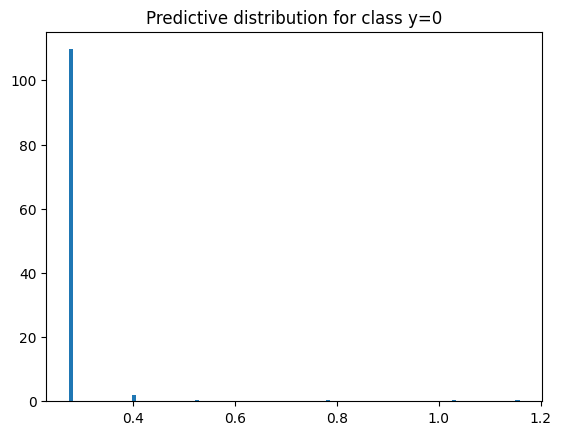

In [14]:
%matplotlib inline  
# The above is required to display matplotlib in jupyter
import matplotlib.pyplot as plt


n, bins, patches = plt.hist(preds_0, bins=100, density=1, cumulative=0)
plt.title('Predictive distribution for class y=0')
plt.show()

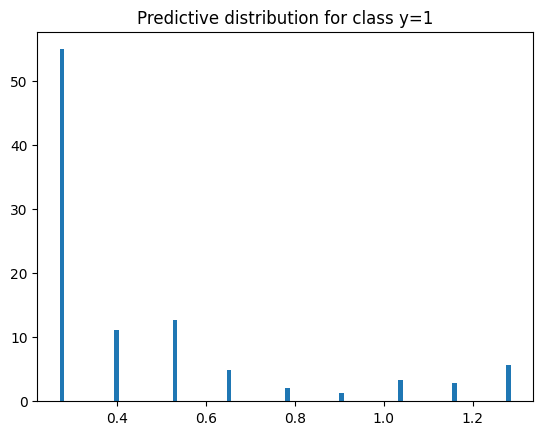

In [15]:
n, bins, patches = plt.hist(preds_1, bins=100, density=1, cumulative=0)
plt.title('Predictive distribution for class y=1')
plt.show()

## Use a library to do the same thing! - SKLEARN
If we use sklearn to do the same thing, we will get the same exact values! 



In [32]:
x = df[['mitoses']]
y = df['class']
from sklearn import datasets, linear_model
lm_model = linear_model.LinearRegression(fit_intercept=True, copy_X=True, n_jobs=1)
lm_model.fit(x, y)
print("sklearn, w, b, score: ", round(lm_model.coef_[0], 6), round(lm_model.intercept_, 6), round(lm_model.score(x,y), 6))
print("manualr, w, b, score: ", round(w, 6) , round(b, 6), round(score, 6))
# So, we have learned the same co-efficents (or, almost the same) through a library.

sklearn, w, b, score:  0.126559 0.272717 0.185764
manualr, w, b, score:  0.126559 0.272717 0.185764


# The Coefficient of Determination (R squared):

Note that lm_model.score(x,y) is the coefficient of determination, $R^2$, of the prediction. <br/>
    
R squared measures the proportion of overall variation of y variable that have been explained by the prediction. The equation for R squared is:
 \begin{align*}
 R^2 = 1 - \frac{\sum_{i=1}^n (y_i-{y'_i})^2}{\sum_{i=1}^n (y_i-\bar{y})^2}
 \end{align*}
 Here, $y_i$ is the label, $y'_i$ is the prediction and $\bar{y}$ is the average label. The error is normalized by the deviance.  
 
 For a binary classification (like here) the $R^2$ is the same as the predictive separation index, but for continuous outcomes it will be different.
 
 Basically, it says how much of the dependent variable is actually explained by the independent variable 
 (via the seperator). It is just PSI for binary classifiers, but extending the PSI idea to continuous variables comes from here. 

# Variable selection
Now loop through each of the feature/variable present in the dataset (except id and class) and fit the model to get a score. Sort features based on their score/R-squared-value the top variables are best predictors. <br/>


In [34]:
features = list(df.keys())
features.remove('id')
features.remove('class')

feature_scores = []

for feature in features:
    x = df[[feature]]
    y = df['class']
    lm_model = linear_model.LinearRegression(fit_intercept=True, copy_X=True, n_jobs=1)
    lm_model.fit(x, y)
    feature_scores.append([feature, lm_model.score(x,y)])

feature_scores.sort(key=lambda x: x[1], reverse=True)
for feature_score in feature_scores:
    print(feature_score)

['uniformity-of-cell-shape', 0.6706524695612857]
['uniformity-of-cell-size', 0.6689665202300585]
['bland-chromatin', 0.5724679929612666]
['clump-thickness', 0.5126579505482682]
['normal-nucleoli', 0.5072909771154664]
['marginal-adhesion', 0.4855305274798587]
['single-epithelial-cell-size', 0.4661947145355013]
['mitoses', 0.18576351399204383]
['bare-nuclei', 0.15365305810688346]


# Linear Regression w/Multiple Variable

Suppose we'd like to use information from multiple features simultaneously to make the prediction? This is a natural extension of single-variable linear regression.

We now suppose we have a set of tuples:

\begin{equation}
(x_{11}, x_{12}, x_{13}, \ldots, x_{1p}, y_1), (x_{21}, x_{22}, x_{23}, \ldots, x_{2p}, y_2), \ldots, (x_{n1}, x_{n2}, x_{n3}, \ldots, x_{np}, y_n)
\end{equation}

The task is to try to predict $y_i$ given $x_{i1}, x_{i2}, x_{i3}, \ldots, x_{ip}$. We can naturally extend linear reagression to this multi variable case:

\begin{equation}
y'_i = w_1*x_{i1}+w_2*x_{i2}+w_3*x_{i3}+\ldots+w_p*x_{ip}+b
\end{equation}

It is simple enough to extend the earlier learning paradigm to this case. Thankfully we don't have to code it, because SKLEARN already covers this case.  

For example, in the following we pick the top two predictors and fit the model. The score will be better this time.

In [35]:
x = df[['uniformity-of-cell-shape','uniformity-of-cell-size']]
y = df['class']
lm_model = linear_model.LinearRegression(fit_intercept=True, copy_X=True, n_jobs=1)
lm_model.fit(x, y)
print("Score: ", lm_model.score(x,y))

Score:  0.7025234823743545


# From Regression to Classification

We have created a "regression model", which predicts a continuous value. However, what we actually want for this task is a classifier - a model which predicts either "true" (malignant) or "benign" (false). We can make a classifier from our regression model in the simplest way possible: by picking a threshold.


Now look at the distribution again and pick a cutoff. Everything below the cutoff will be 0 and above will be 1. 

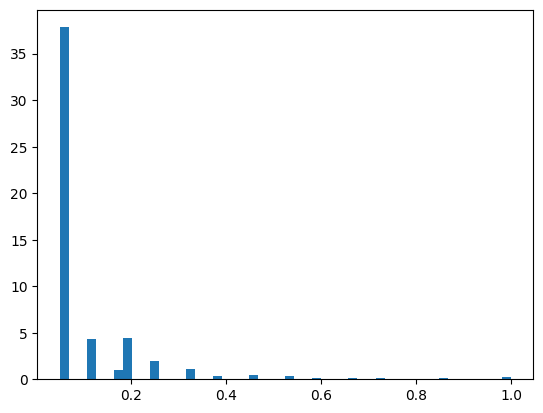

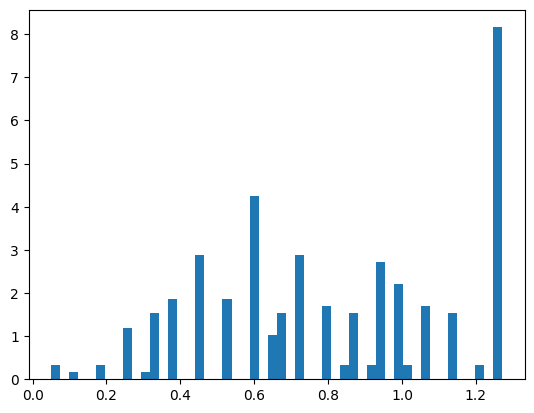

In [36]:
input_0 = df.loc[df['class'] == 0]
y_0 = input_0['class']
x_0 = input_0[['uniformity-of-cell-shape','uniformity-of-cell-size']]

input_1 = df.loc[df['class'] == 1]
y_1 = input_1['class']
x_1 = input_1[['uniformity-of-cell-shape','uniformity-of-cell-size']]
preds_0 = lm_model.predict(x_0)
preds_1 = lm_model.predict(x_1)
n, bins, patches = plt.hist(preds_0, bins=50, density=1, cumulative=0)
plt.show()
n, bins, patches = plt.hist(preds_1, bins=50, density=1, cumulative=0)
plt.show()

# Accuracy

From the above plots it looks like 0.2 is a good cutoff? Let's pick that and look at the accuracy of the model, i.e. how accurate is the model when we say y'_i > 0.2 is "true" but otherwise "false":


In [37]:
y_pred = lm_model.predict(x)
y_pred = [1 if p > 0.2 else 0 for p in y_pred] # Binarizing the predictions using
# a cutoff of 0.2
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.9313304721030042

Accuracy here is defined as the Jaccard similarity coefficient score - which is here equivalent to the fraction of predictions that are correct.


## Splitting the dataset
But we can't trust these results! We trained and tested on the same data. This may overfit the data and give us an illusion of better fit. Let's split the dataset in 80-20 for training-testing and fit and test the model again.

In [38]:
# split into train and test data
from sklearn.model_selection import train_test_split

(train,test) = train_test_split(df, test_size=0.2)
train_output = train['class']
train_input = train[['uniformity-of-cell-shape','uniformity-of-cell-size']]

test_output = test['class']
test_input = test[['uniformity-of-cell-shape','uniformity-of-cell-size']]

In [1]:
lm_model.fit(train_input, train_output)
print("Score: ", lm_model.score(train_input, train_output))

NameError: name 'lm_model' is not defined

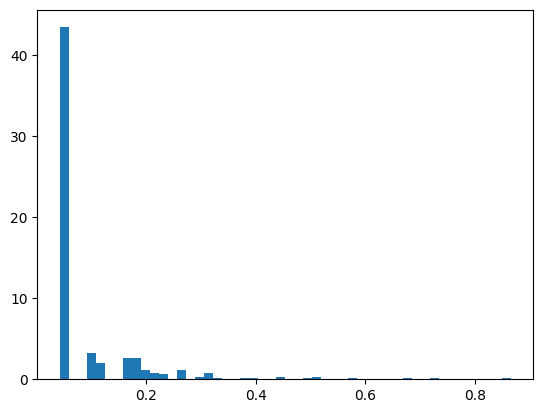

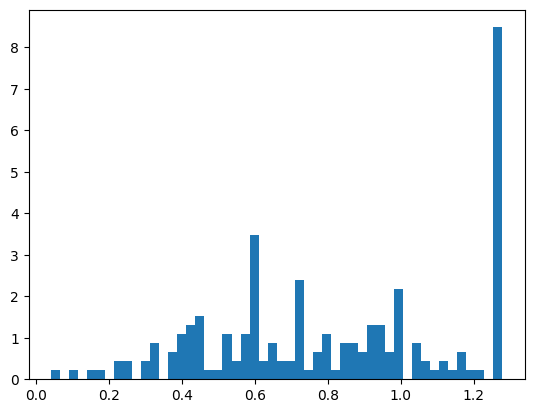

In [23]:
input_0 = train.loc[train['class'] == 0]
y_0 = input_0['class']
x_0 = input_0[['uniformity-of-cell-shape','uniformity-of-cell-size']]

input_1 = train.loc[train['class'] == 1]
y_1 = input_1['class']
x_1 = input_1[['uniformity-of-cell-shape','uniformity-of-cell-size']]
preds_0 = lm_model.predict(x_0)
preds_1 = lm_model.predict(x_1)
n, bins, patches = plt.hist(preds_0, bins=50, density=1, cumulative=0)
plt.show()
n, bins, patches = plt.hist(preds_1, bins=50, density=1, cumulative=0)
plt.show()

In [40]:
y_pred = lm_model.predict(test_input)
y_pred = [1 if p > 0.5 else 0 for p in y_pred]
from sklearn.metrics import accuracy_score
accuracy_score(test_output, y_pred)

0.9285714285714286

# Decomposing accuracy
We see that we are getting decent accuracy. But accuracy in a model doesn't necessarily mean the model is useful for our purposes. There are many other statistics that can help us understand the effectiveness of a model. Sensitivity, specificity are widely used. We are going to look at false positive rate and false negative rates.

In [43]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_output, y_pred))
tn, fp, fn, tp = confusion_matrix(test_output, y_pred).ravel()
fpr = fp * 1.0 / (fp+tn) # Fraction of true negative cases with a positive prediction
fnr = fn * 1.0 / (tp+fn) # Fraction of true positive cases with a negative prediction
print("False positive rate: (predicting malignant while benign)", fpr)
print("False negative rate: (predicting benign while malignant)", fnr)

[[81  1]
 [ 9 49]]
False positive rate: (predicting malignant while benign) 0.012195121951219513
False negative rate: (predicting benign while malignant) 0.15517241379310345


## Which case is the worst?
Think about this model in action. It has a low false positive rate but a high false negative rate. False negative results in real world are very dangerous in our case. On the other hand, false positive results will cause a lot of chaos. But, if we have to make a decision, which is the best one? It depends, but if we change out cut-off we can change the trade-off between FPR and FNR.

In [44]:
y_pred = lm_model.predict(test_input)
y_pred = [1 if p > 0.1 else 0 for p in y_pred]

print("Accuracy", accuracy_score(test_output, y_pred))

print(confusion_matrix(test_output, y_pred))
tn, fp, fn, tp = confusion_matrix(test_output, y_pred).ravel()
fpr = fp * 1.0 / (fp+tn) # Fraction of true negative cases with a positive prediction
fnr = fn * 1.0 / (tp+fn) # Fraction of true positive cases with a negative prediction
print("False positive rate: (predicting malignant while benign)", fpr)
print("False negative rate: (predicting benign while malignant)", fnr)

Accuracy 0.8214285714285714
[[57 25]
 [ 0 58]]
False positive rate: (predicting malignant while benign) 0.3048780487804878
False negative rate: (predicting benign while malignant) 0.0


## Homework

* Browse through the SciKit Learn tutorial here: https://scikit-learn.org/stable/tutorial/basic/tutorial.html#learning-and-predicting

* Now let's generalize what we've learned to discover a new classification method. This is part 1 of the first homework:

http://bit.ly/3pgN34P